# Importing Dependencies

Imported all the necessary dependencies for the project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Reading the Dataset

The dataset was extracted from NYC Open Data at the following link:
https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95/about_data

In [2]:
collision_data = pd.read_csv('/Users/sakshiagarwal/Desktop/PROJECTS/NYC Collision Analysis/Motor_Vehicle_Collisions_-_Crashes_20240622.csv',low_memory=False,dtype={'BOROUGH':str})

In [3]:
data_dictionary = pd.read_csv('/Users/sakshiagarwal/Desktop/PROJECTS/NYC Collision Analysis/Collisions_Datadictionary.csv',index_col = 0)

In [4]:
data_dictionary.head()

,Column Name,Column Description,Primary Key or Foreign Key,"Additional Notes \n(where applicable, includes the range of possible values, units of measure, how to interpret null/zero values, whether there are specific relationships between columns, and/or information on column source)"
Table Name,,,,
MV-Collisions - Crash,COLLISION_ID,Unique record code generated by system,Primary Key for the crash table,NaN
MV-Collisions - Crash,ACCIDENT_DATE,Occurrence date of collision,NaN,NaN
MV-Collisions - Crash,ACCIDENT_TIME,Occurrence time of collision,NaN,NaN
MV-Collisions - Crash,BOROUGH,Borough where collision occurred,NaN,NaN
MV-Collisions - Crash,ZIP CODE,Postal code of incident occurrence,NaN,NaN


In [5]:
collision_data.tail()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
2097654,06/18/2024,16:28,BROOKLYN,11236,NaN,NaN,NaN,AVENUE L,EAST 87 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4733923,Sedan,Sedan,NaN,NaN,NaN
2097655,06/15/2024,1:30,NaN,NaN,0.000000,0.000000,"(0.0, 0.0)",DE KALB AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4734315,E-Scooter,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2097656,06/15/2024,9:45,BRONX,10472,40.830177,-73.853004,"(40.830177, -73.853004)",NaN,NaN,2130 HAVILAND AVENUE,...,Unspecified,Unspecified,Unspecified,NaN,4734325,Sedan,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN
2097657,06/11/2024,7:00,QUEENS,11697,40.561245,-73.910530,"(40.561245, -73.91053)",NaN,NaN,28 MARKET STREET,...,Unspecified,NaN,NaN,NaN,4734349,Pick-up Truck,NaN,NaN,NaN,NaN
2097658,06/18/2024,8:04,BROOKLYN,11203,40.653442,-73.936390,"(40.653442, -73.93639)",TROY AVENUE,LINDEN BOULEVARD,NaN,...,Unspecified,NaN,NaN,NaN,4733980,Sedan,Bike,NaN,NaN,NaN


In [6]:
collision_data.columns = collision_data.columns.str.lower()

In [7]:
collision_data.columns = collision_data.columns.str.replace(' ','_')

In [8]:
collision_data.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [9]:
collision_data.shape

(2097659, 29)

In [10]:
collision_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097659 entries, 0 to 2097658
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   crash_date                     object 
 1   crash_time                     object 
 2   borough                        object 
 3   zip_code                       object 
 4   latitude                       float64
 5   longitude                      float64
 6   location                       object 
 7   on_street_name                 object 
 8   cross_street_name              object 
 9   off_street_name                object 
 10  number_of_persons_injured      float64
 11  number_of_persons_killed       float64
 12  number_of_pedestrians_injured  int64  
 13  number_of_pedestrians_killed   int64  
 14  number_of_cyclist_injured      int64  
 15  number_of_cyclist_killed       int64  
 16  number_of_motorist_injured     int64  
 17  number_of_motorist_killed      int64  
 18  co

# Data Cleaning

Data Cleaning involves:
- Dropping unnecessary columns
- Imputing missing values for critical columns.
- Correcting Data Types
- Removing Duplicates
- Handling Inconsistent Data
- Standardizing and Normalizing Data

In [11]:
collision_data['crash_date'] = pd.to_datetime(collision_data['crash_date'])
collision_data['crash_time'] = pd.to_datetime(collision_data['crash_time'], format='%H:%M').dt.time

In [12]:
collision_data['crash_datetime'] = pd.to_datetime(collision_data['crash_date'].astype(str) + ' ' + collision_data['crash_time'].astype(str))

In [13]:
collision_data.head(3)

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,...,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,crash_datetime
0,2021-09-11,02:39:00,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN,2021-09-11 02:39:00
1,2022-03-26,11:45:00,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN,2022-03-26 11:45:00
2,2022-06-29,06:55:00,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN,2022-06-29 06:55:00


In [14]:
missing_values = collision_data.isnull().sum()
print(missing_values)

crash_date                             0
crash_time                             0
borough                           652632
zip_code                          652890
latitude                          235139
longitude                         235139
location                          235139
on_street_name                    446938
cross_street_name                 795819
off_street_name                  1743094
number_of_persons_injured             18
number_of_persons_killed              31
number_of_pedestrians_injured          0
number_of_pedestrians_killed           0
number_of_cyclist_injured              0
number_of_cyclist_killed               0
number_of_motorist_injured             0
number_of_motorist_killed              0
contributing_factor_vehicle_1       6956
contributing_factor_vehicle_2     326757
contributing_factor_vehicle_3    1947412
contributing_factor_vehicle_4    2063658
contributing_factor_vehicle_5    2088436
collision_id                           0
vehicle_type_cod

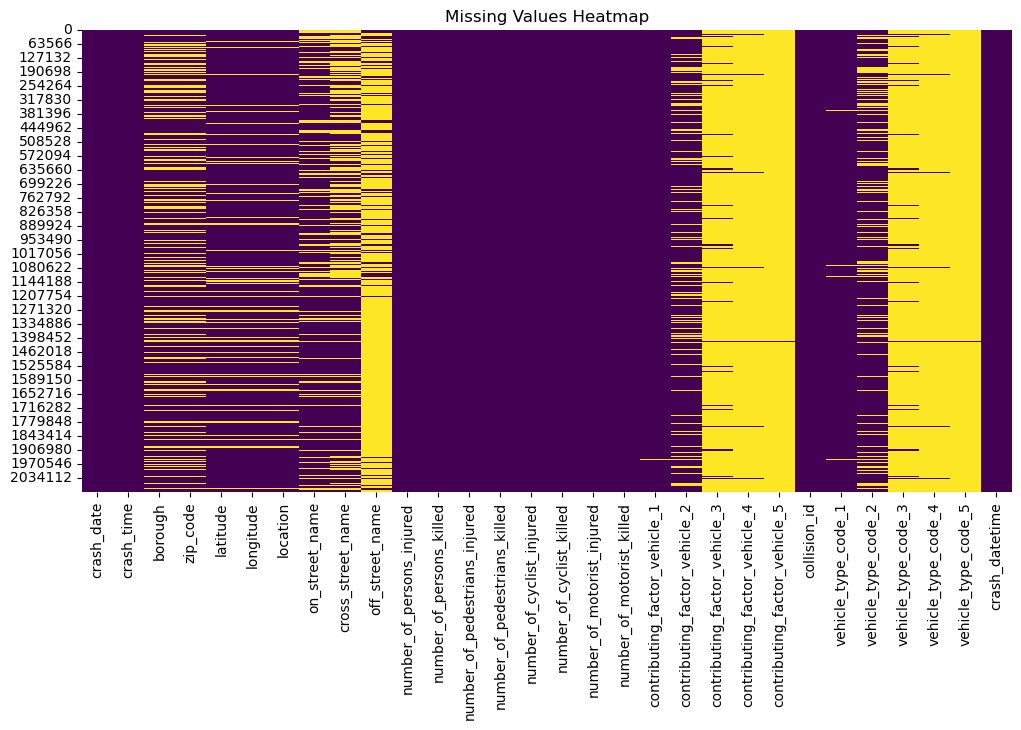

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(collision_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [16]:
collision_data['borough'].value_counts()

BROOKLYN         460068
QUEENS           387509
MANHATTAN        323001
BRONX            213787
STATEN ISLAND     60662
Name: borough, dtype: int64

In [17]:
columns_to_drop = [
    'latitude', 'longitude', 'location', 'off_street_name', 
    'contributing_factor_vehicle_3', 'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
    'vehicle_type_code_3', 'vehicle_type_code_4', 'vehicle_type_code_5'
]
collision_data.drop(columns=columns_to_drop, inplace=True)

In [18]:
collision_data['borough'].fillna(collision_data['borough'].mode()[0], inplace=True)
collision_data['zip_code'].fillna('Unknown', inplace=True)

In [19]:
duplicates = collision_data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [20]:
collision_data['contributing_factor_vehicle_1'].fillna('Unknown', inplace=True)
collision_data['vehicle_type_code_1'].fillna('Unknown', inplace=True)

In [21]:
print(collision_data.isnull().sum())

crash_date                            0
crash_time                            0
borough                               0
zip_code                              0
on_street_name                   446938
cross_street_name                795819
number_of_persons_injured            18
number_of_persons_killed             31
number_of_pedestrians_injured         0
number_of_pedestrians_killed          0
number_of_cyclist_injured             0
number_of_cyclist_killed              0
number_of_motorist_injured            0
number_of_motorist_killed             0
contributing_factor_vehicle_1         0
contributing_factor_vehicle_2    326757
collision_id                          0
vehicle_type_code_1                   0
vehicle_type_code_2              403894
crash_datetime                        0
dtype: int64


# Exploratory Data Analysis

## Trend of Accidents Over Time

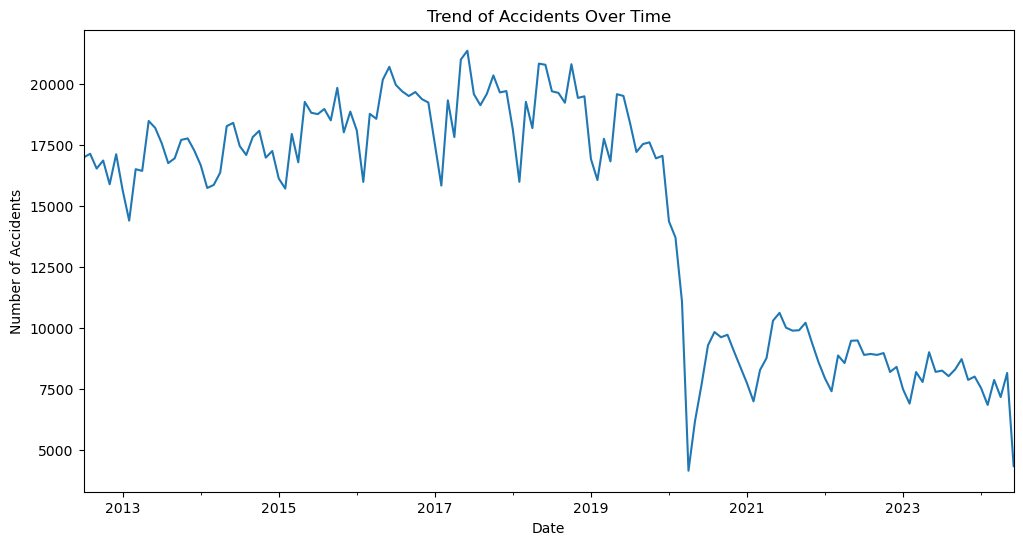

In [22]:
collision_data.set_index('crash_datetime', inplace=True)

plt.figure(figsize=(12, 6))
collision_data.resample('M').size().plot()
plt.title('Trend of Accidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.show()

## Trend of Accidents by Borough

In [23]:
boroughs = collision_data['borough'].unique()

In [24]:
print(boroughs)

['BROOKLYN' 'BRONX' 'MANHATTAN' 'QUEENS' 'STATEN ISLAND']


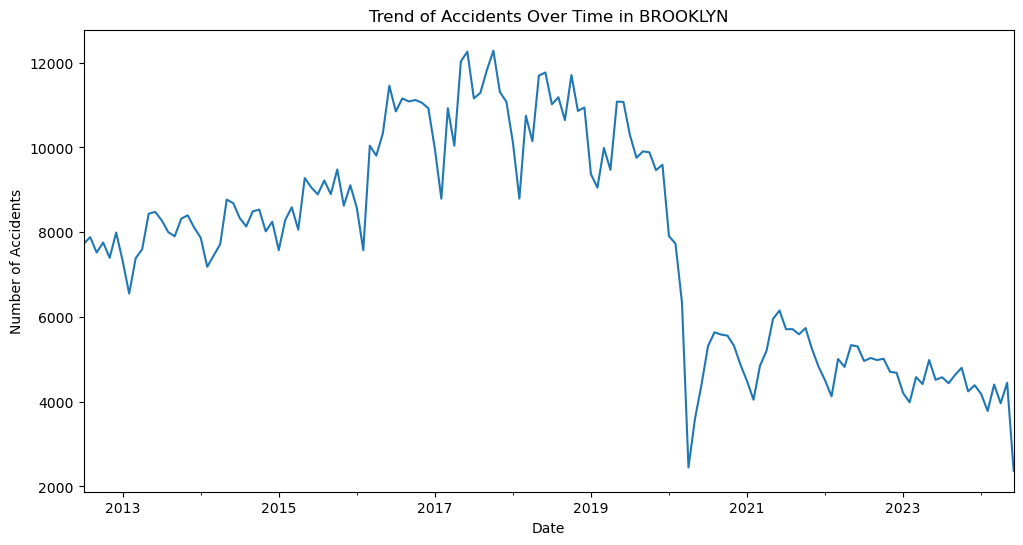

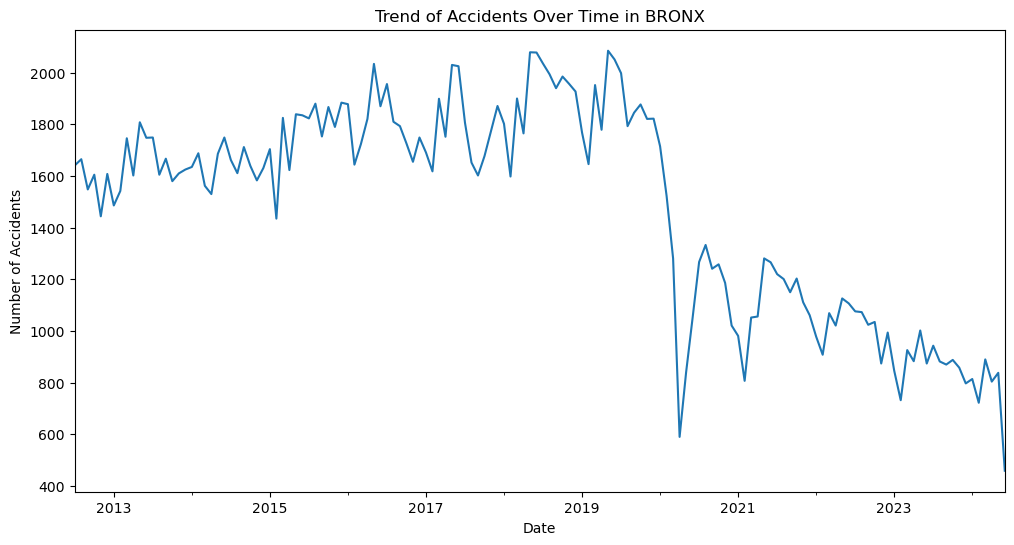

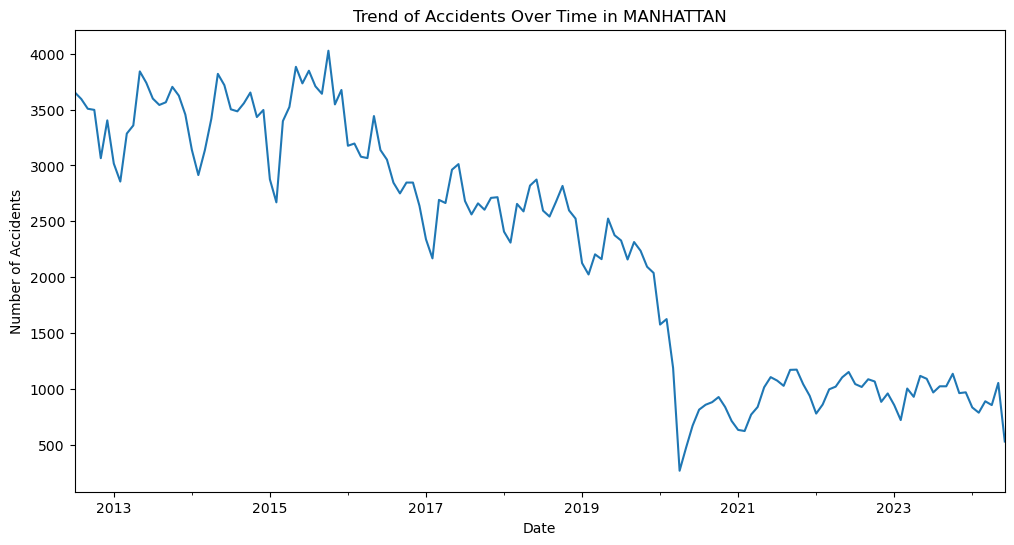

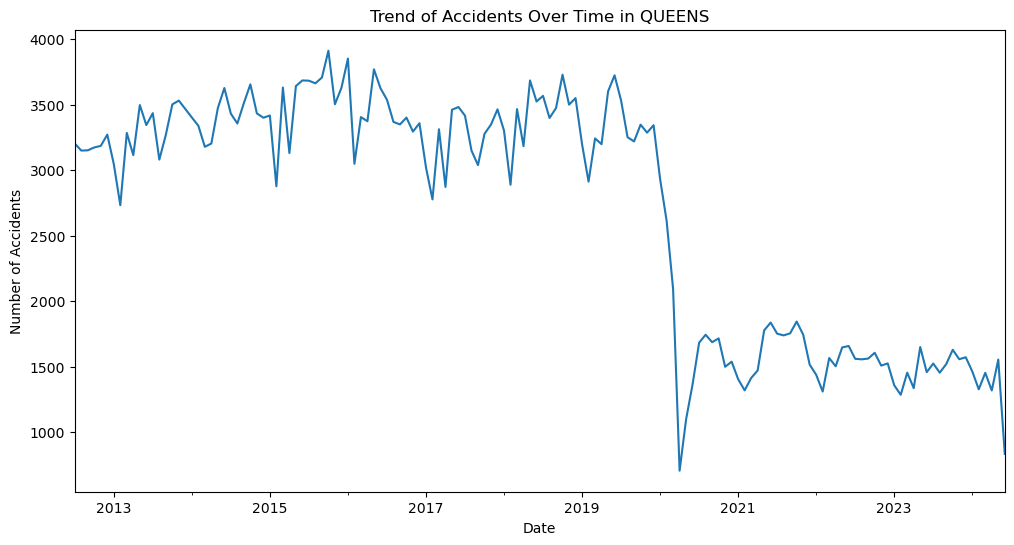

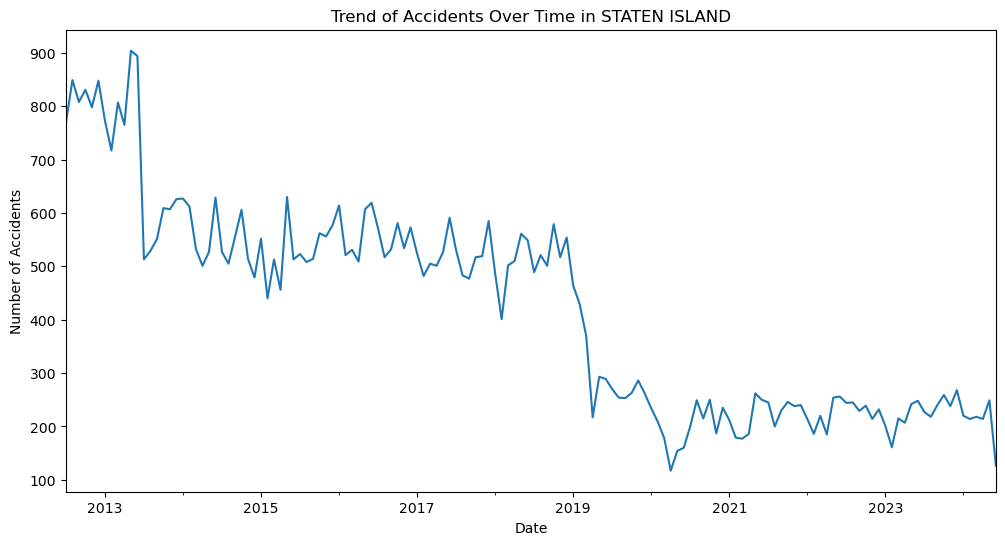

In [25]:
for borough in boroughs:
    plt.figure(figsize=(12, 6))
    borough_data = collision_data[collision_data['borough'] == borough]
    borough_data.resample('M').size().plot()
    plt.title(f'Trend of Accidents Over Time in {borough}')
    plt.xlabel('Date')
    plt.ylabel('Number of Accidents')
    plt.show()

In [26]:
def get_max_accidents_borough(data, year):
    start_date = f'{year}-01-01'
    end_date = f'{year}-12-31'
    if year == 2024:
        end_date = '2024-06-21'
    
    yearly_data = data[start_date:end_date]
    max_accidents_borough = yearly_data.groupby('borough').size().idxmax()
    return max_accidents_borough

years = [2021, 2022, 2023, 2024]
for year in years:
    max_borough = get_max_accidents_borough(collision_data, year)
    print(f'The borough with the maximum accidents in {year} is {max_borough}.')

The borough with the maximum accidents in 2021 is BROOKLYN.
The borough with the maximum accidents in 2022 is BROOKLYN.
The borough with the maximum accidents in 2023 is BROOKLYN.
The borough with the maximum accidents in 2024 is BROOKLYN.


## Peak Time for Accidents in Each Borough

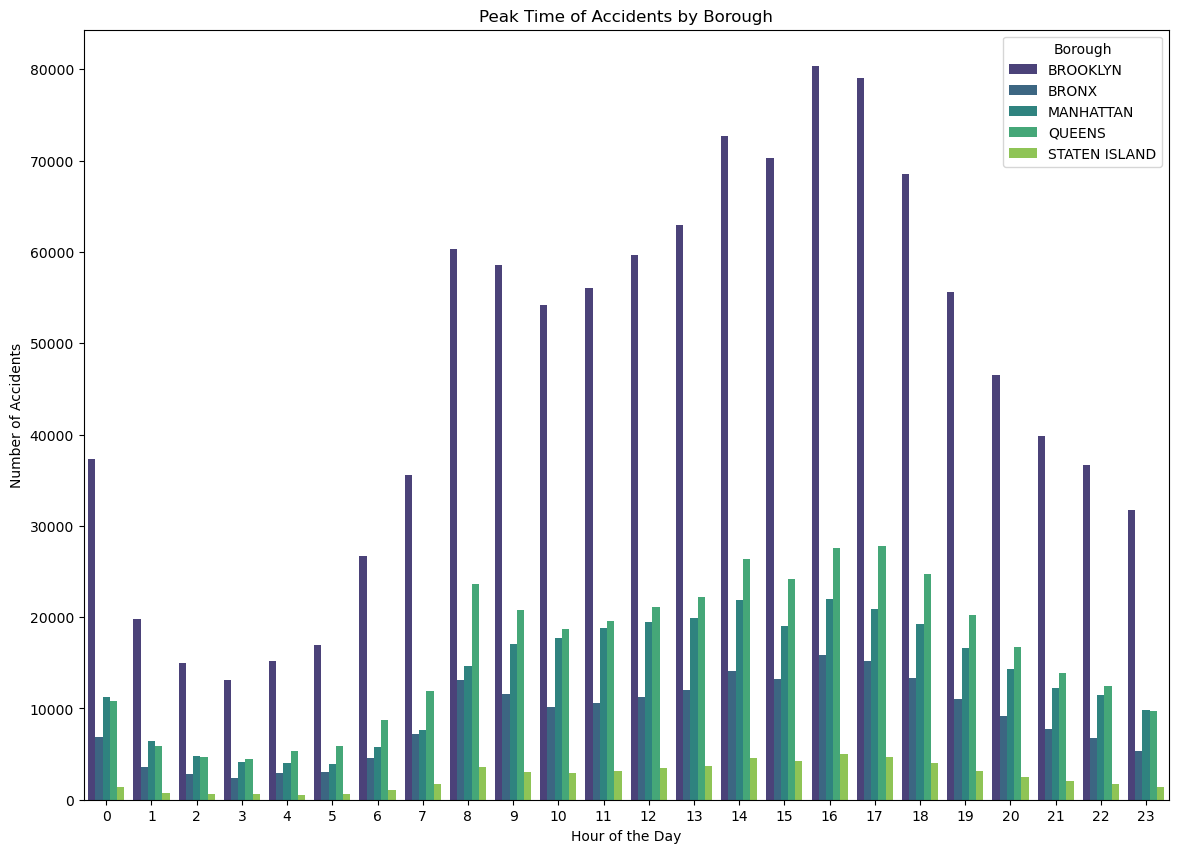

Peak hours for accidents in each borough:
           borough  hour  counts
16           BRONX    16   15893
40        BROOKLYN    16   80321
64       MANHATTAN    16   21993
89          QUEENS    17   27823
112  STATEN ISLAND    16    4980


In [27]:
collision_data['hour'] = collision_data.index.hour

plt.figure(figsize=(14, 10))
sns.countplot(data=collision_data, x='hour', hue='borough', palette='viridis')
plt.title('Peak Time of Accidents by Borough')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.legend(title='Borough')
plt.show()

peak_hours = collision_data.groupby(['borough', 'hour']).size().reset_index(name='counts')
peak_hours = peak_hours.loc[peak_hours.groupby('borough')['counts'].idxmax()]

print("Peak hours for accidents in each borough:")
print(peak_hours)

## Weekday and Weekend Collisions by Hour

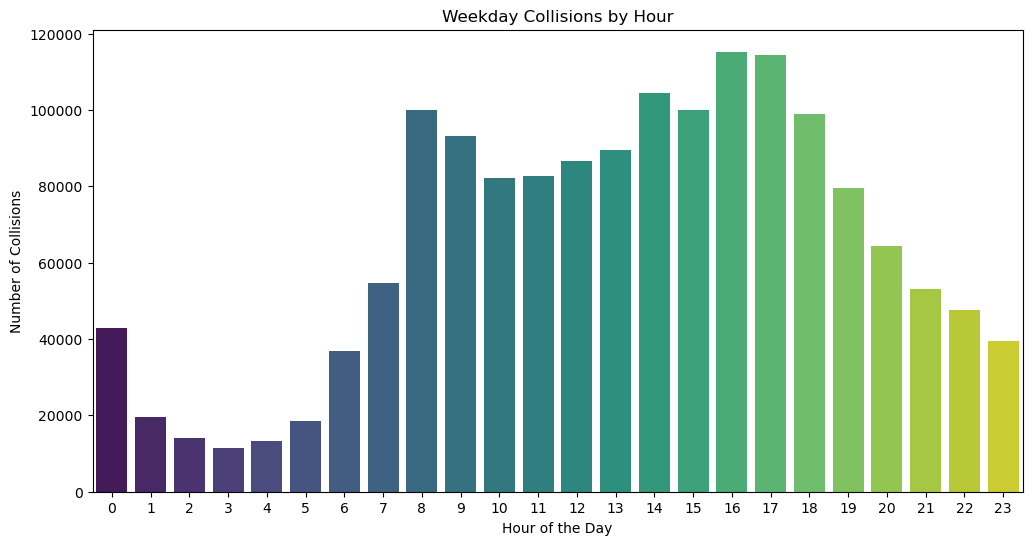

In [28]:
collision_data['day_of_week'] = collision_data.index.dayofweek
collision_data['is_weekend'] = collision_data['day_of_week'] >= 5

weekday_data = collision_data[collision_data['is_weekend'] == False]
weekday_hourly_counts = weekday_data.groupby('hour').size()

plt.figure(figsize=(12, 6))
sns.barplot(x=weekday_hourly_counts.index, y=weekday_hourly_counts.values, palette='viridis')
plt.title('Weekday Collisions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Collisions')
plt.show()

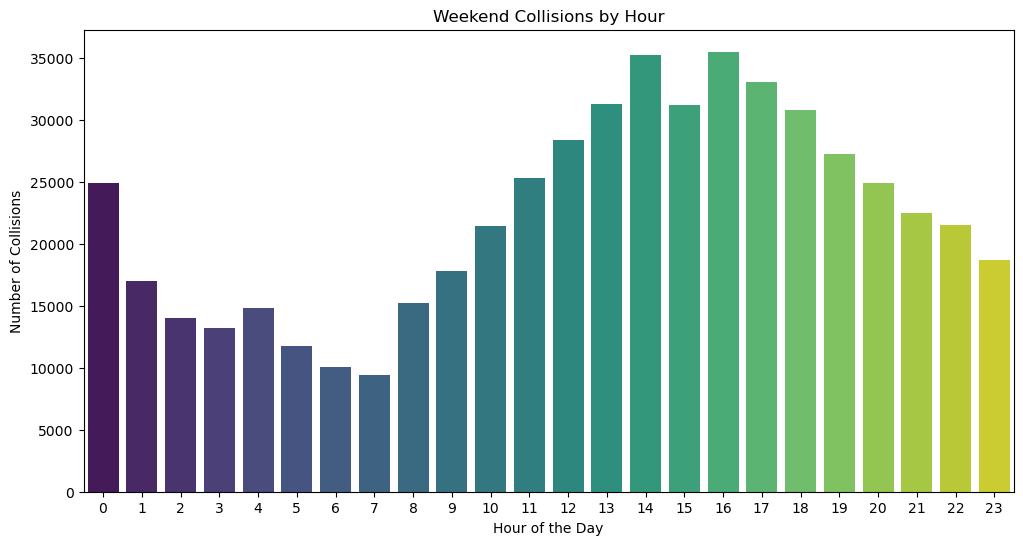

In [29]:
weekend_data = collision_data[collision_data['is_weekend'] == True]
weekend_hourly_counts = weekend_data.groupby('hour').size()

plt.figure(figsize=(12, 6))
sns.barplot(x=weekend_hourly_counts.index, y=weekend_hourly_counts.values, palette='viridis')
plt.title('Weekend Collisions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Collisions')
plt.show()

## Rate of weekday and weekend collisions per volume by Hour

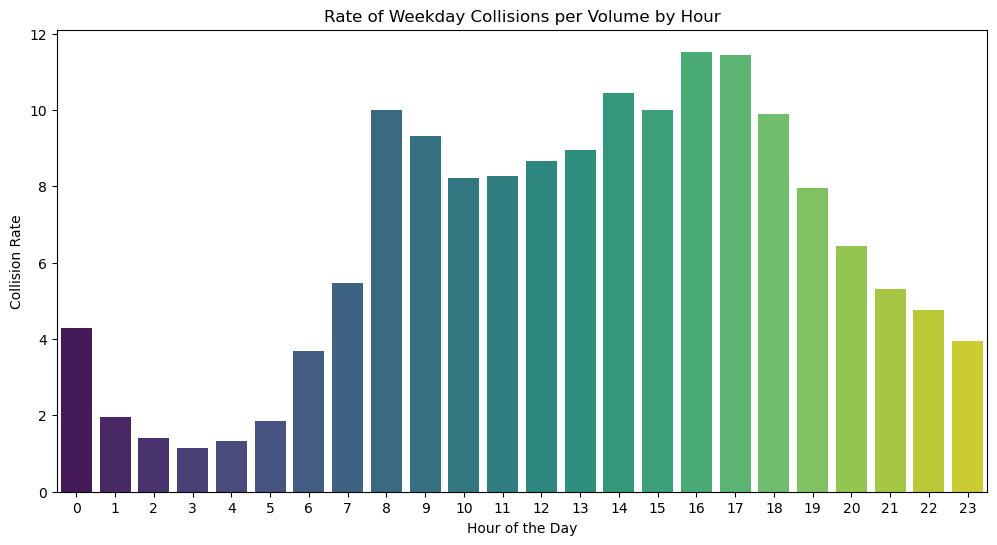

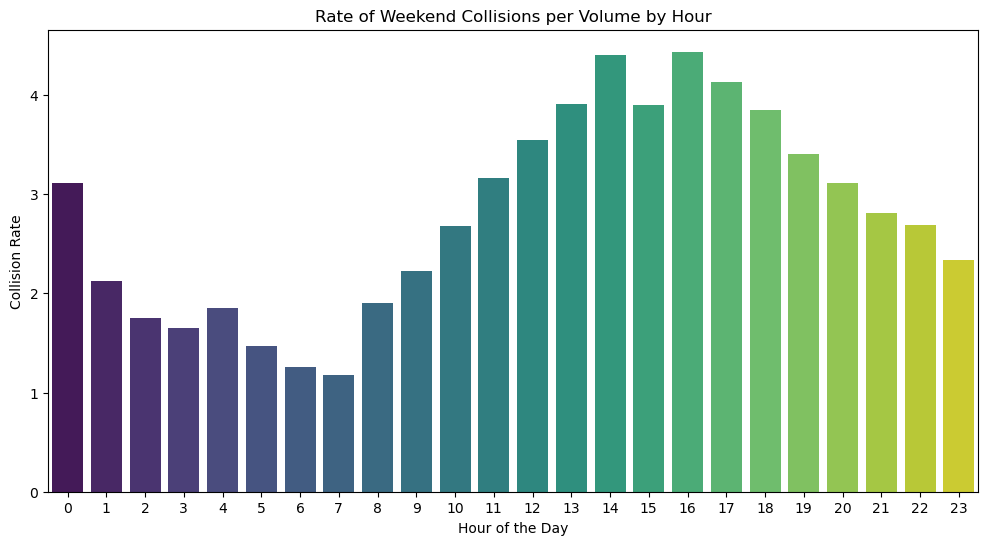

In [31]:
traffic_volume = {
    'weekday': [10000] * 24,  
    'weekend': [8000] * 24  
}

weekday_collision_rate = weekday_hourly_counts / traffic_volume['weekday']
weekend_collision_rate = weekend_hourly_counts / traffic_volume['weekend']

plt.figure(figsize=(12, 6))
sns.barplot(x=weekday_collision_rate.index, y=weekday_collision_rate.values, palette='viridis')
plt.title('Rate of Weekday Collisions per Volume by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Collision Rate')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=weekend_collision_rate.index, y=weekend_collision_rate.values, palette='viridis')
plt.title('Rate of Weekend Collisions per Volume by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Collision Rate')
plt.show()

## Collisions by Contributing Factor

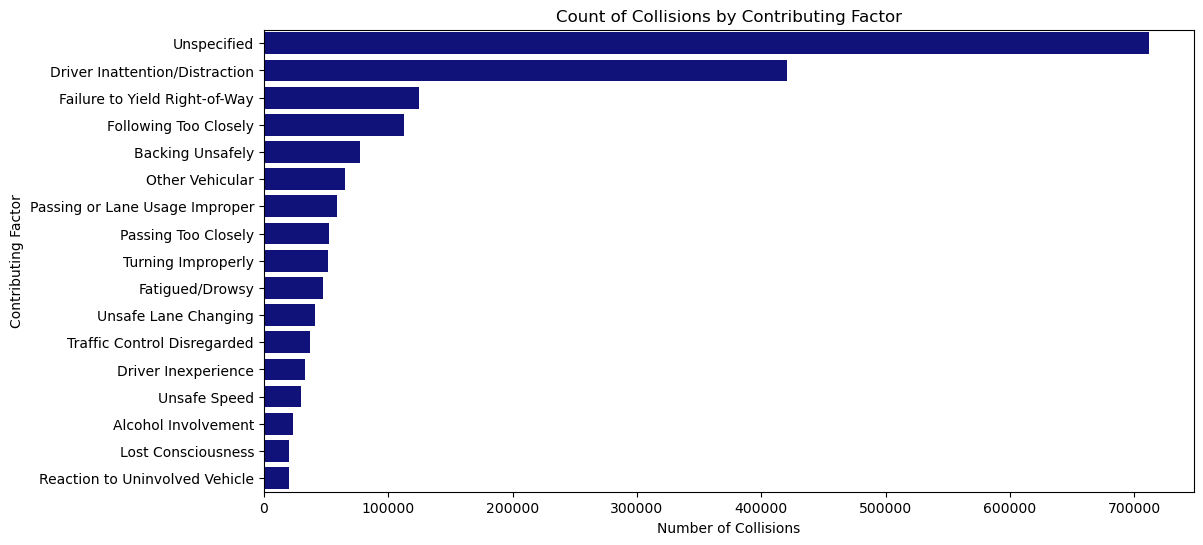

In [32]:
contributing_factor_counts = collision_data['contributing_factor_vehicle_1'].value_counts()
contributing_factor_counts = contributing_factor_counts[contributing_factor_counts > 20000]

plt.figure(figsize=(12, 6))
sns.barplot(x=contributing_factor_counts.values, y=contributing_factor_counts.index, palette=['#00008B'] * len(contributing_factor_counts))
plt.title('Count of Collisions by Contributing Factor')
plt.xlabel('Number of Collisions')
plt.ylabel('Contributing Factor')
plt.show()

## Collisions by Vehicle Type

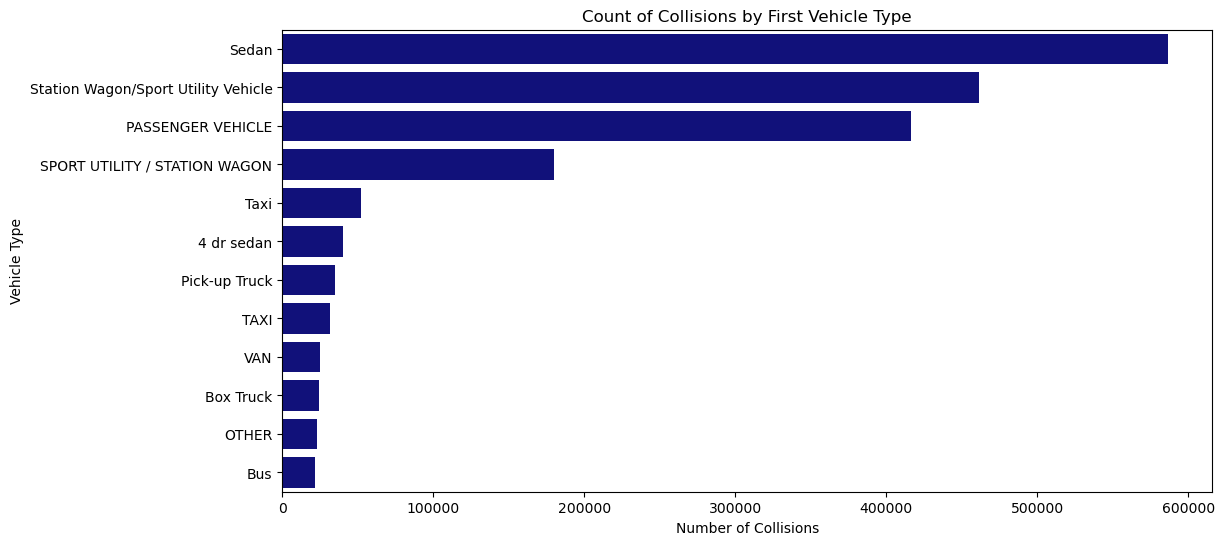

In [33]:
vehicle_type_counts = collision_data['vehicle_type_code_1'].value_counts()
vehicle_type_counts = vehicle_type_counts[vehicle_type_counts > 20000]

plt.figure(figsize=(12, 6))
sns.barplot(x=vehicle_type_counts.values, y=vehicle_type_counts.index, palette=['#00008B'] * len(vehicle_type_counts))
plt.title('Count of Collisions by First Vehicle Type')
plt.xlabel('Number of Collisions')
plt.ylabel('Vehicle Type')
plt.show()

## Analysis of Fatalities and Injuries

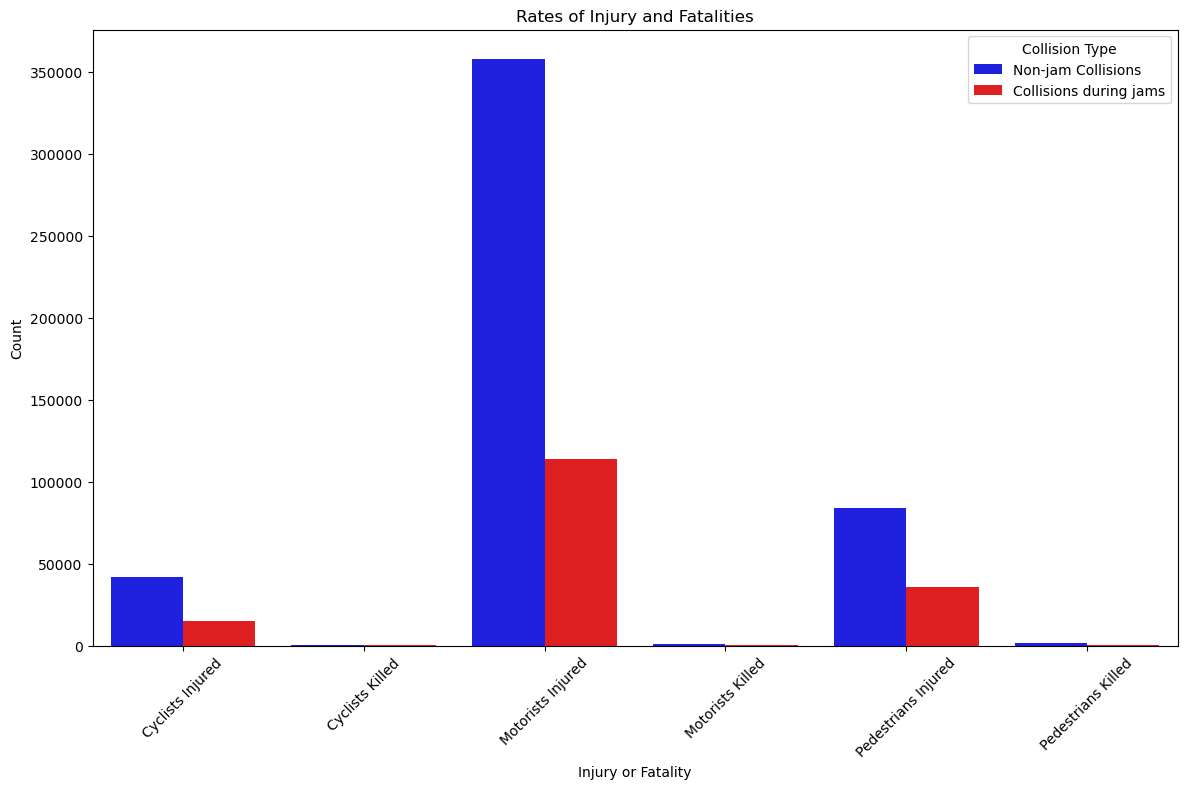

In [34]:
collision_data['jam_condition'] = collision_data['hour'].isin([7, 8, 9, 16, 17, 18]) & (collision_data['day_of_week'] < 5)

jam_collisions = collision_data[collision_data['jam_condition'] == True]
non_jam_collisions = collision_data[collision_data['jam_condition'] == False]

injury_fatality_counts_jam = jam_collisions[['number_of_cyclist_injured', 'number_of_cyclist_killed', 
                                             'number_of_motorist_injured', 'number_of_motorist_killed', 
                                             'number_of_pedestrians_injured', 'number_of_pedestrians_killed']].sum()

injury_fatality_counts_non_jam = non_jam_collisions[['number_of_cyclist_injured', 'number_of_cyclist_killed', 
                                                     'number_of_motorist_injured', 'number_of_motorist_killed', 
                                                     'number_of_pedestrians_injured', 'number_of_pedestrians_killed']].sum()

injury_fatality_df = pd.DataFrame({
    'Type': ['Cyclists Injured', 'Cyclists Killed', 
             'Motorists Injured', 'Motorists Killed', 
             'Pedestrians Injured', 'Pedestrians Killed'],
    'Non-jam Collisions': injury_fatality_counts_non_jam.values,
    'Collisions during jams': injury_fatality_counts_jam.values
})

injury_fatality_melted = pd.melt(injury_fatality_df, id_vars=['Type'], 
                                 value_vars=['Non-jam Collisions', 'Collisions during jams'], 
                                 var_name='Collision Type', value_name='Count')

plt.figure(figsize=(14, 8))
sns.barplot(x='Type', y='Count', hue='Collision Type', data=injury_fatality_melted, palette=['blue', 'red'])
plt.title('Rates of Injury and Fatalities')
plt.xlabel('Injury or Fatality')
plt.ylabel('Count')
plt.legend(title='Collision Type')
plt.xticks(rotation=45)
plt.show()

## Collision Prone Area

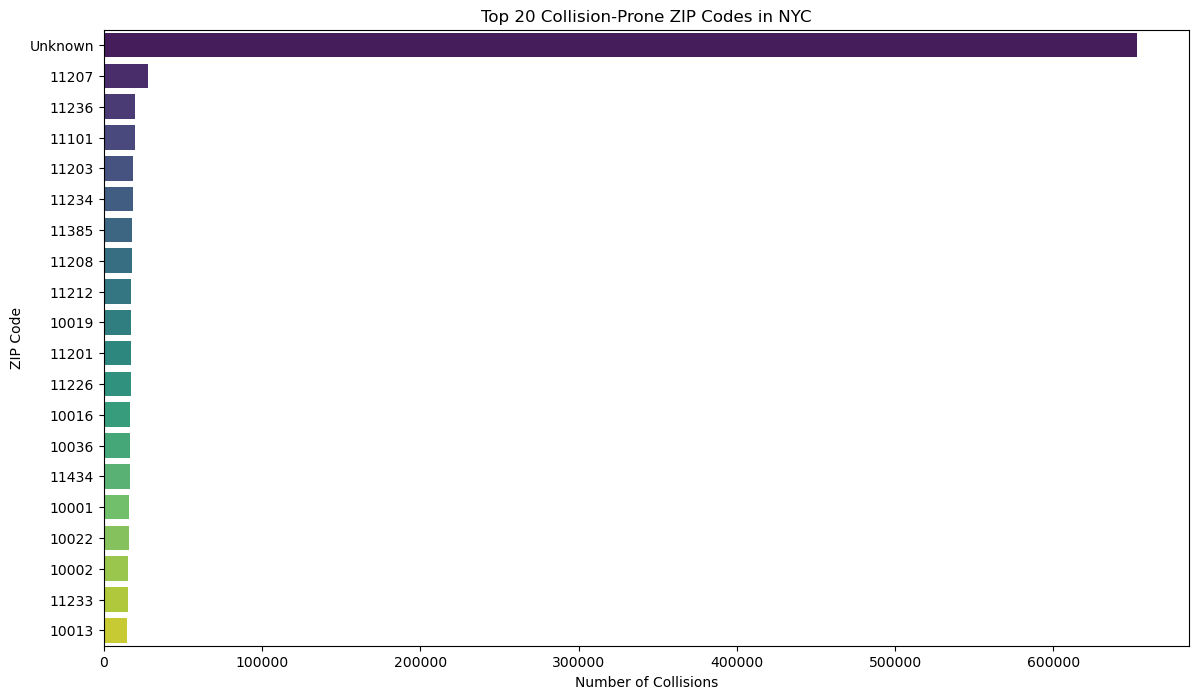

In [35]:
zip_code_collisions = collision_data['zip_code'].value_counts().reset_index()
zip_code_collisions.columns = ['zip_code', 'collision_count']

top_zip_codes = zip_code_collisions.head(20)

plt.figure(figsize=(14, 8))
sns.barplot(x='collision_count', y='zip_code', data=top_zip_codes, palette='viridis')
plt.title('Top 20 Collision-Prone ZIP Codes in NYC')
plt.xlabel('Number of Collisions')
plt.ylabel('ZIP Code')
plt.show()

zip_code_locations = pd.DataFrame({
    'zip_code': ['10001', '10002', '10003', '10004'],
    'latitude': [40.753685, 40.717040, 40.731829, 40.700330],
    'longitude': [-73.999163, -73.987984, -73.989130, -74.015119]
})

merged_data = pd.merge(zip_code_collisions, zip_code_locations, on='zip_code')

m = folium.Map(location=[40.7128, -74.0060], zoom_start=12)
heat_data = [[row['latitude'], row['longitude'], row['collision_count']] for index, row in merged_data.iterrows()]
HeatMap(heat_data).add_to(m)
m.save('collision_heatmap.html')
m

# Collision Prone Areas

You can view the interactive map of collision-prone areas here as Github is unable to render Folium maps
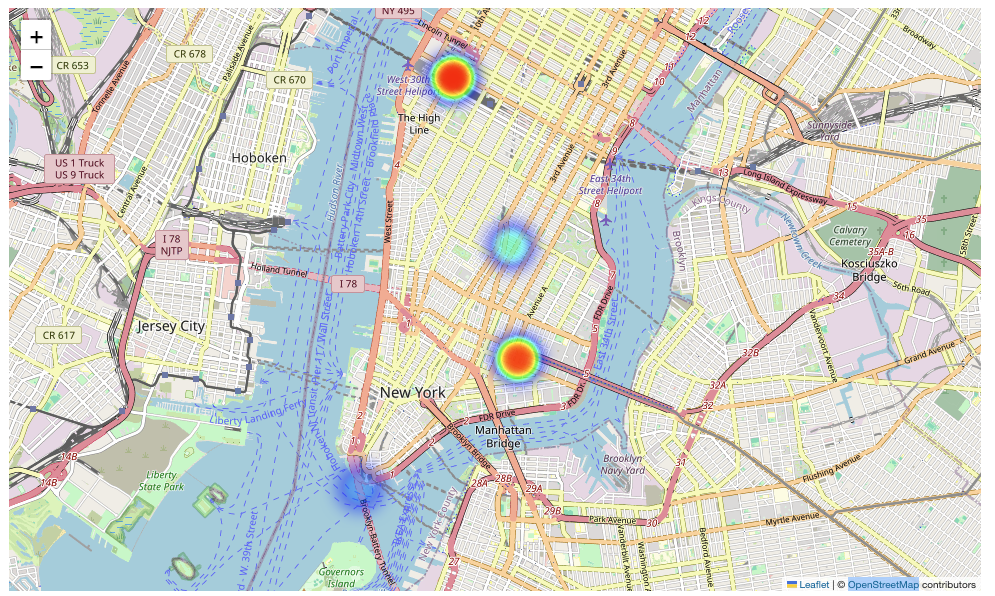

## Number of people injured and killed in each borough

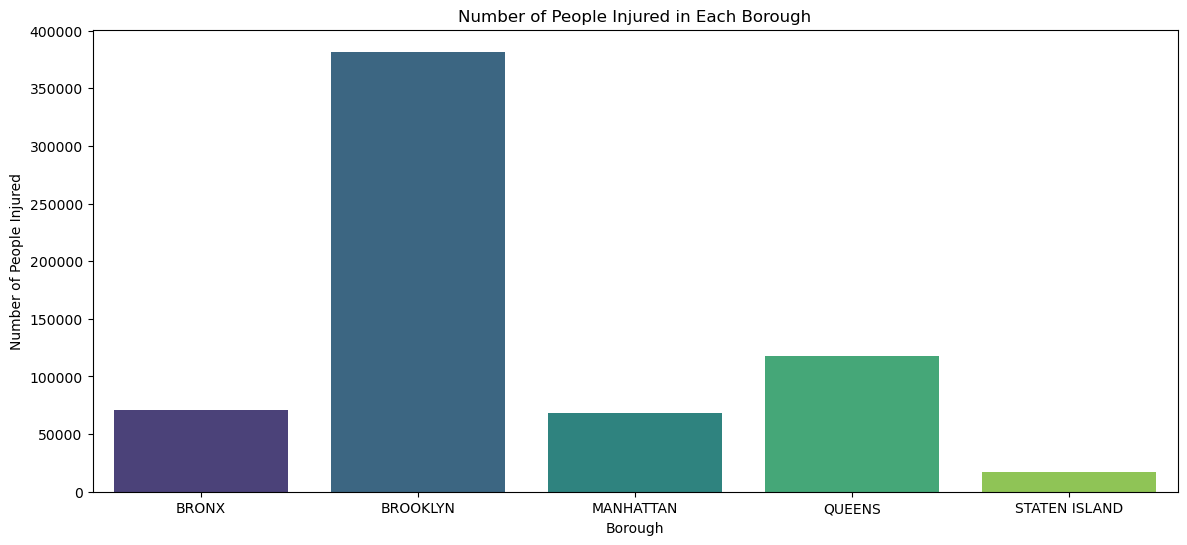

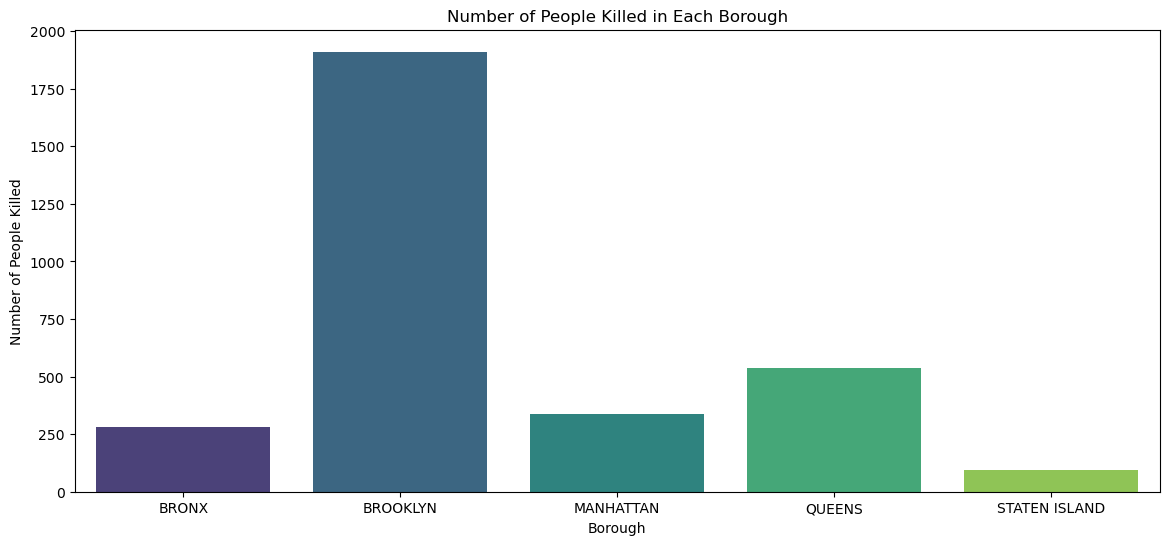

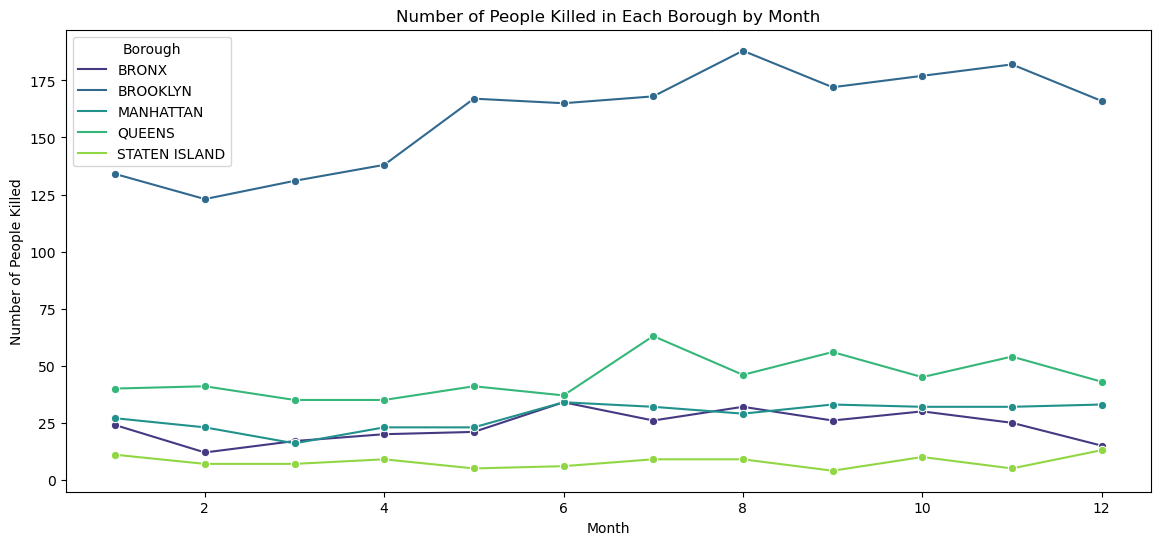

In [37]:
collision_data['month'] = collision_data['crash_date'].dt.month

borough_summary = collision_data.groupby('borough').agg({
    'number_of_persons_injured': 'sum',
    'number_of_persons_killed': 'sum'
}).reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(x='borough', y='number_of_persons_injured', data=borough_summary, palette='viridis')
plt.title('Number of People Injured in Each Borough')
plt.xlabel('Borough')
plt.ylabel('Number of People Injured')
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(x='borough', y='number_of_persons_killed', data=borough_summary, palette='viridis')
plt.title('Number of People Killed in Each Borough')
plt.xlabel('Borough')
plt.ylabel('Number of People Killed')
plt.show()

monthly_fatalities = collision_data.groupby(['borough', 'month'])['number_of_persons_killed'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(x='month', y='number_of_persons_killed', hue='borough', data=monthly_fatalities, palette='viridis', marker='o')
plt.title('Number of People Killed in Each Borough by Month')
plt.xlabel('Month')
plt.ylabel('Number of People Killed')
plt.legend(title='Borough')
plt.show()

## Monthly Injuries from NYC Vehicle Collisions

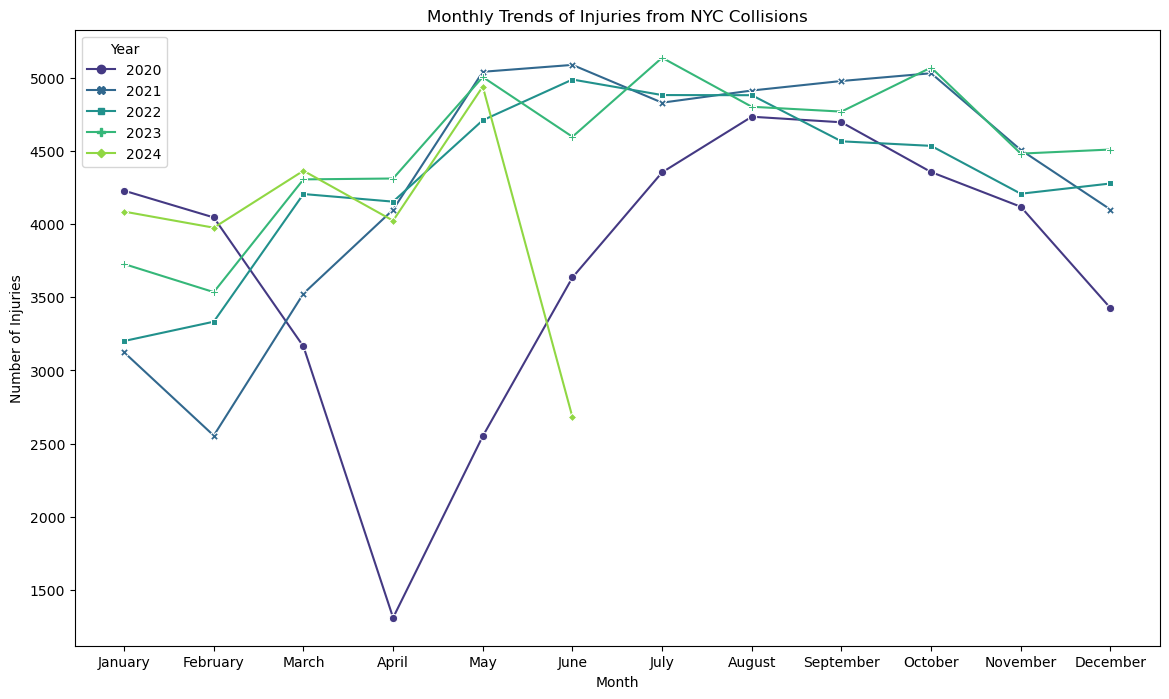

In [41]:
collision_data = collision_data[collision_data['crash_date'].dt.year.isin([2020, 2021, 2022, 2023, 2024])]
collision_data.loc[:, 'year'] = collision_data['crash_date'].dt.year
collision_data.loc[:, 'month'] = collision_data['crash_date'].dt.month
monthly_injuries = collision_data.groupby(['year', 'month'])['number_of_persons_injured'].sum().reset_index()

monthly_injuries_pivot = monthly_injuries.pivot(index='month', columns='year', values='number_of_persons_injured')

plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_injuries_pivot, markers=True, dashes=False, palette='viridis')
plt.title('Monthly Trends of Injuries from NYC Collisions')
plt.xlabel('Month')
plt.ylabel('Number of Injuries')
plt.legend(title='Year')
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.show()

## Monthly Fatalities due to NYC Vehicle Collisions

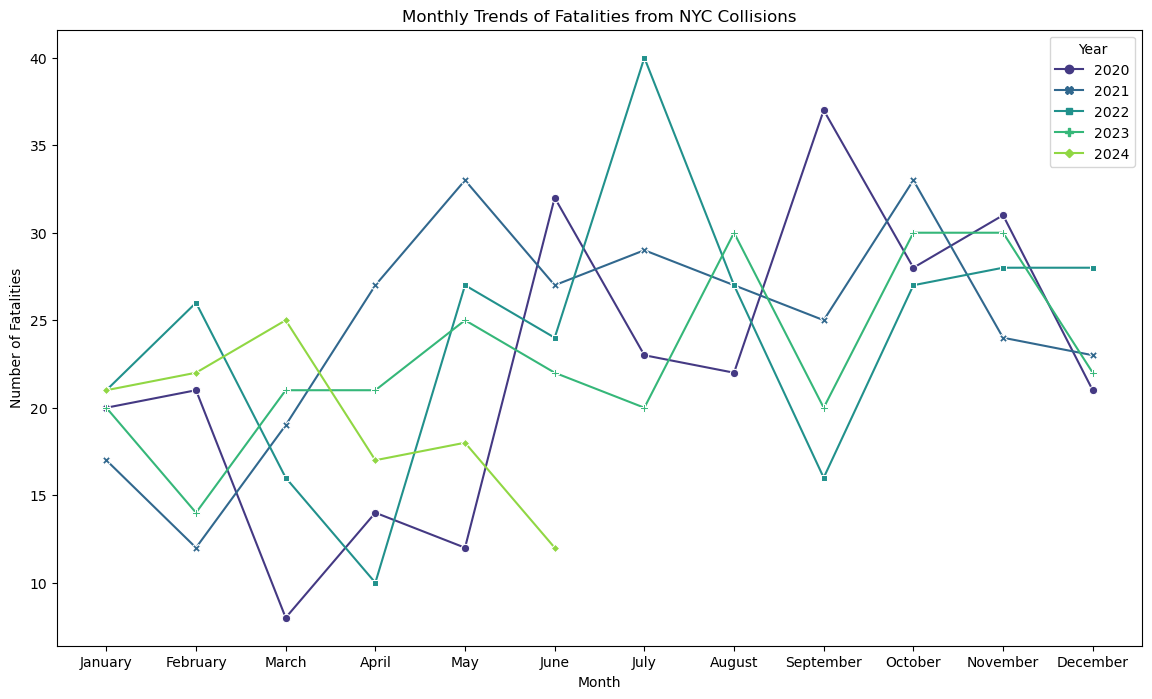

In [39]:
monthly_fatalities = collision_data.groupby(['year', 'month'])['number_of_persons_killed'].sum().reset_index()
monthly_fatalities_pivot = monthly_fatalities.pivot(index='month', columns='year', values='number_of_persons_killed')

plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_fatalities_pivot, markers=True, dashes=False, palette='viridis')
plt.title('Monthly Trends of Fatalities from NYC Collisions')
plt.xlabel('Month')
plt.ylabel('Number of Fatalities')
plt.legend(title='Year')
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.show()

## Injuries and Fatalities due to Contributing Factor as Distraction/Driver Inattention

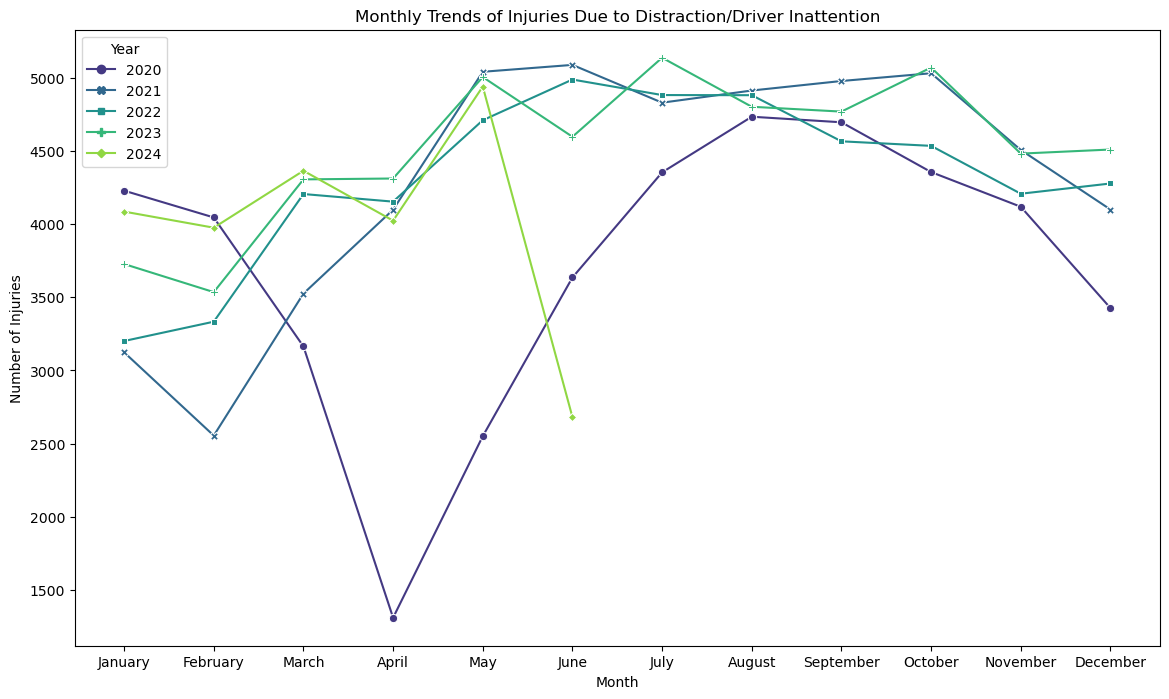

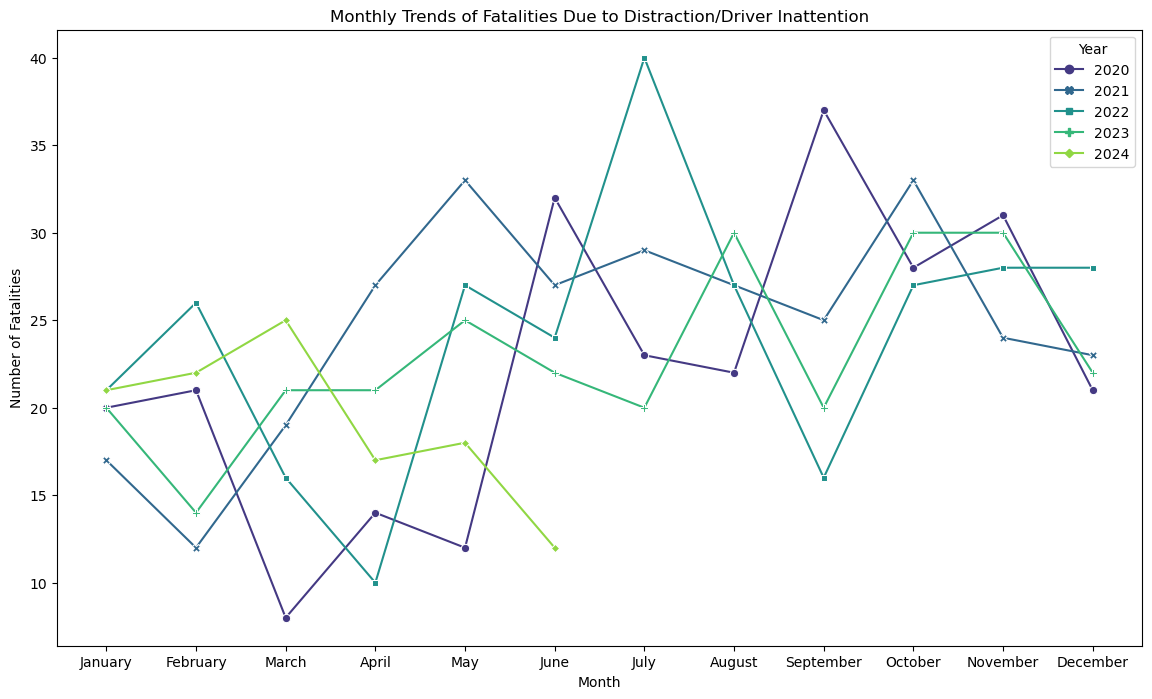

In [40]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_injuries_pivot, markers=True, dashes=False, palette='viridis')
plt.title('Monthly Trends of Injuries Due to Distraction/Driver Inattention')
plt.xlabel('Month')
plt.ylabel('Number of Injuries')
plt.legend(title='Year')
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_fatalities_pivot, markers=True, dashes=False, palette='viridis')
plt.title('Monthly Trends of Fatalities Due to Distraction/Driver Inattention')
plt.xlabel('Month')
plt.ylabel('Number of Fatalities')
plt.legend(title='Year')
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.show()